In [55]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [20]:
df = pd.read_csv("imdb_top_1000.csv")

In [39]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont
1,The Godfather,1972,175 min,Crime,9.2,Francis Ford Coppola
2,The Dark Knight,2008,152 min,Action,9.0,Christopher Nolan
3,The Godfather: Part II,1974,202 min,Crime,9.0,Francis Ford Coppola
4,12 Angry Men,1957,96 min,Crime,9.0,Sidney Lumet


In [36]:
##removendo colunas que não são interessantes
df = df.drop(columns=['Poster_Link','Certificate','Overview','Meta_score','Star1','Star2','Star3','Star4','No_of_Votes','Gross'])

In [42]:
#renomeando colunas
df=df.rename(columns={"Series_Title":"Titulo","Released_Year":"Ano","Runtime":"Duracao", "Genre":"Genero","IMDB_Rating":"Nota IMDB","Director":"Diretor"})


In [43]:
df.head()

,Titulo,Ano,Duracao,Genero,Nota IMDB,Diretor
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont
1,The Godfather,1972,175 min,Crime,9.2,Francis Ford Coppola
2,The Dark Knight,2008,152 min,Action,9.0,Christopher Nolan
3,The Godfather: Part II,1974,202 min,Crime,9.0,Francis Ford Coppola
4,12 Angry Men,1957,96 min,Crime,9.0,Sidney Lumet


In [37]:
df.shape

(1000, 6)

In [38]:
df.dtypes

Series_Title      object
Released_Year     object
Runtime           object
Genre             object
IMDB_Rating      float64
Director          object
dtype: object

In [41]:
##valores nulos
df.isnull().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Director         0
dtype: int64

In [54]:
##media de notas por ano
df.groupby("Ano")["Nota IMDB"].mean().sort_values(ascending = False).head()

Ano
1936    8.500000
1921    8.300000
1957    8.277778
1994    8.238462
1942    8.233333
Name: Nota IMDB, dtype: float64

In [53]:
##media de notas por Diretor
df.groupby("Diretor")["Nota IMDB"].mean().sort_values(ascending = False).head()

Diretor
Frank Darabont     8.95
Irvin Kershner     8.70
Lana Wachowski     8.70
George Lucas       8.60
Roberto Benigni    8.60
Name: Nota IMDB, dtype: float64

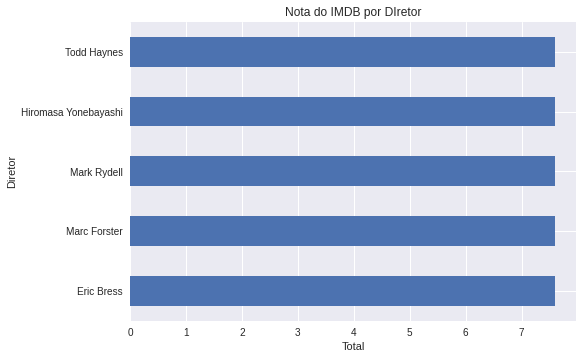

In [62]:
df.groupby("Diretor")["Nota IMDB"].sum().sort_values(ascending = True).head().plot.barh(title="Nota do IMDB por DIretor")
plt.xlabel("Total")
plt.ylabel("Diretor");

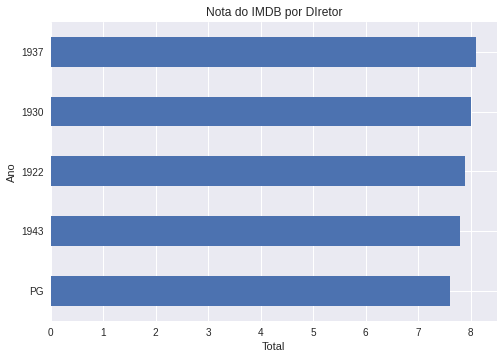

In [65]:
df.groupby("Ano")["Nota IMDB"].sum().sort_values(ascending = True).head().plot.barh(title="Nota do IMDB por DIretor")
plt.xlabel("Total")
plt.ylabel("Ano");

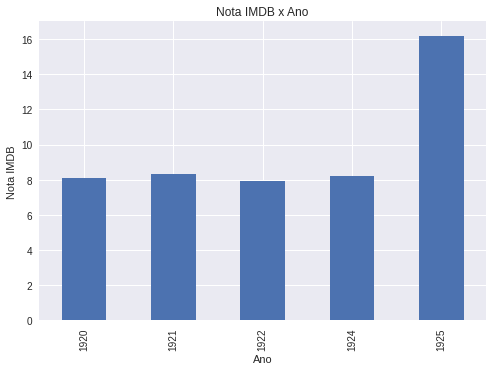

In [73]:
df.groupby(df["Ano"])["Nota IMDB"].sum().head().plot.bar(title="Nota IMDB x Ano")
plt.xlabel("Ano")
plt.ylabel("Nota IMDB");

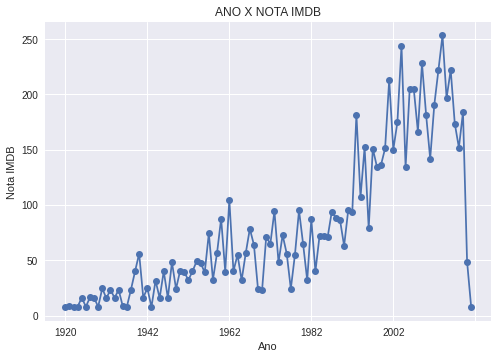

In [75]:
df.groupby(df["Ano"])["Nota IMDB"].sum().plot(title="ANO X NOTA IMDB", marker = "o")
plt.xlabel("Ano")
plt.ylabel("Nota IMDB");

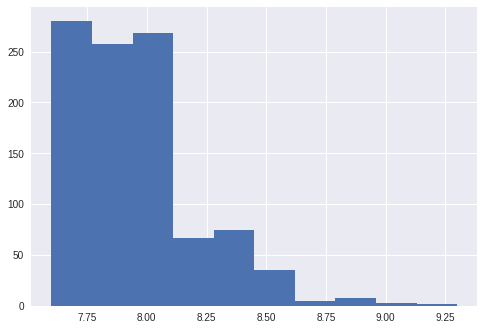

In [81]:
plt.hist(df["Nota IMDB"]);

In [78]:
df["Nota IMDB"].min()

7.6

In [79]:
df["Nota IMDB"].max()

9.3

In [82]:
df.to_csv("df_imdb_top_1000_novo.csv", index=False)